![image.png](pear.png)

***

# Welcome to Pear Inc. 

Hi there! 
My name is Robert! You can call me Bob 😉. <br>
I'm the communications officer (fancy title ha!) in our glorious company 😇.
My job is to help facilitate product development and market penetration 🤓. <br>
I spent endless hours talking to engineers, product managers, and  customers 😱  

Since we are a 20 people start-up (All of us have fancy names 😂), I also do some recruiting from time to time 💪 <br>
We are looking for **brave souls who are not afraid of a challenge and will help us** with our new product line of smart t-shirts! 🧐 <br> 

(Our CEO believes that smart t-shirts are the right direction for some reason 😅 I guess if you make something nobody needs, you won't have to sell it 🤓) <br>

Let me tell you a little bit more about our problem that you can help us with:<br>
We are creating a life changing smart t-shirt which has bluetooth and connects to your phone 🥳. They will be customizable outfits through downloaded applications. Our smart t-shirt will be developed with Google Wear OS which is a version of Google's Android operating system designed for smartwatches and other wearables. So users will be able to install custom programs through Google Play Store 🤭. <br> And we will sell them for 999.9$ a piece 💰💰💰<br>
But our engineers wanted to ensure that only Pear Inc. approved programs can be installed on our t-shirts because
market analysis showed that potential customers are afraid of ransomware that will break their "*premium*" t-shirts 🤦‍. So we need an antivirus for approving apps on the fly! <br>However, we don't want to install an off the shelf antivirus to our t-shirts 🤫, because BIG profit margins matter 🏦!

##### Enough chit-chat!
Let's get down to the business of why I contacted you: <br>
Our bright engineers came up with an algorithm that creates compressed signatures for the apps in the Google Play Store. It is called '*manifold averaging generally intelligent compressor*' or as we call it 'MAGIC'. <br>
The engineers told us that the outputs of MAGIC reflect the statistical properties of the uncompressed apps (whatever that may mean! 🤦‍). <br> MAGIC takes a Google Play Store app as an input and outputs a 4 dimensional numerical signature (they called it a vector but calling it a vector is not fancy enough for marketing! 🤪).   

Now, since these signatures are just numbers, an off the shelf antivirus can't work with them (even if it could, we can't install an off the shelf antivirus into our t-shirts -- too much computing power and space is needed). Therefore **we need a light weight proof of concept that takes these signatures as inputs and outputs labels (virus or not) for them.** We eventually want to install your program into our smart t-shirts, where it will scan a Google Play Store app (its signature to be precise!) and stop the app's execution if it thinks the app is a virus! But we are not going so far just yet so you only need to create the pipeline that take the signatures, and output labels for them. Don't worry about the rest, it is just a proof of concept at the end 😉. We are providing the dataset for you to develop your model.

In a nutshell: 
- There 4 dimensional (4 feature) numerical inputs (signatures) with labels!
- We need a simple model that takes these inputs and labels them (Virus, Not a Virus)
- We also need you to evaluate your model. Choose any metric you want, but don't forget to explain why, since I don't know much about this field (that is why we need your help!)

Things to keep in mind:
- There are less 'Virus' in the dataset than 'Not a Virus'. (Naturally!)
- While we call it MAGIC, it still sometimes doesn't work well 🤦‍, so there are signatures with missing features (missing values).
- I don't know much about these things so please show your work, your thinking process and please make it as clear as possible, otherwise I get confused 😵. (Visualizations of the data and comments in your code would be great!)

***
##### Let me describe the dataset, and you are ready to get to work!

It is a CSV file. Each row represents a signature for an app. First 4 columns from left to right represent dimensions (features) and the last column is the label (isVirus: True or False). 

- Visualize the data (so that people like me can understand!)
- Clean up the data (balance it out, impute missing values and so on... depending on the method you are going to use!)
- Visualize the cleaned data (so that people like me can understand the effect of cleaning process!)
- Create a simple model that performs reasonably well. (If it doesn't perform well, comment on why and how to improve it!)
- Evaluate the model with a testset you will create from the dataset. (Pretty plots make things easier to understand)
- Upload your code to a private github repo you can share with us, and invite us (https://github.com/tarikkranda, https://github.com/ltc0060 and https://github.com/ahmetkoklu) as collaborators so only we can see our super-secret project. 

And you are done! (Don't forget to comment, and show your work please 🤓)


### SOLUTION :


In [ ]:
# Your code here!

Mehmet Batuhan Duman

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Load the data into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

# Display the first few rows
print(df.head())


   feature_1  feature_2  feature_3  feature_4  isVirus
0  -0.233467   0.308799   2.484015   1.732721    False
1   1.519003   1.238482   3.344450   0.783744    False
2   0.400640   1.916748   3.291096  -0.918519    False
3  -1.616474   0.209703   1.461544  -0.291837    False
4   1.480515   5.299829   2.640670   1.867559     True


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1897 non-null   float64
 1   feature_2  1899 non-null   float64
 2   feature_3  1893 non-null   float64
 3   feature_4  1897 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB
None


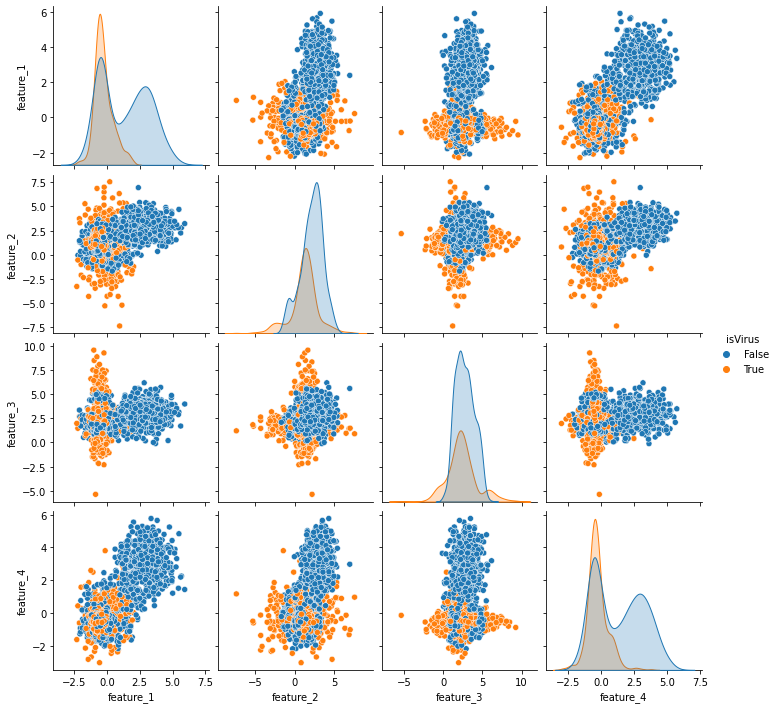

In [12]:
# Visualize the data
sns.pairplot(df, hue='isVirus')
plt.show()


In [29]:
print(df.isnull())

      feature_1  feature_2  feature_3  feature_4  isVirus
0         False      False      False      False    False
1         False      False      False      False    False
2         False      False      False      False    False
3         False      False      False      False    False
4         False      False      False      False    False
...         ...        ...        ...        ...      ...
1991      False      False      False      False    False
1993      False      False      False      False    False
1994      False      False      False      False    False
1996      False      False      False      False    False
1997      False      False      False      False    False

[1622 rows x 5 columns]


In [28]:
df.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
isVirus      0
dtype: int64

In [27]:
df.dropna(inplace=True)

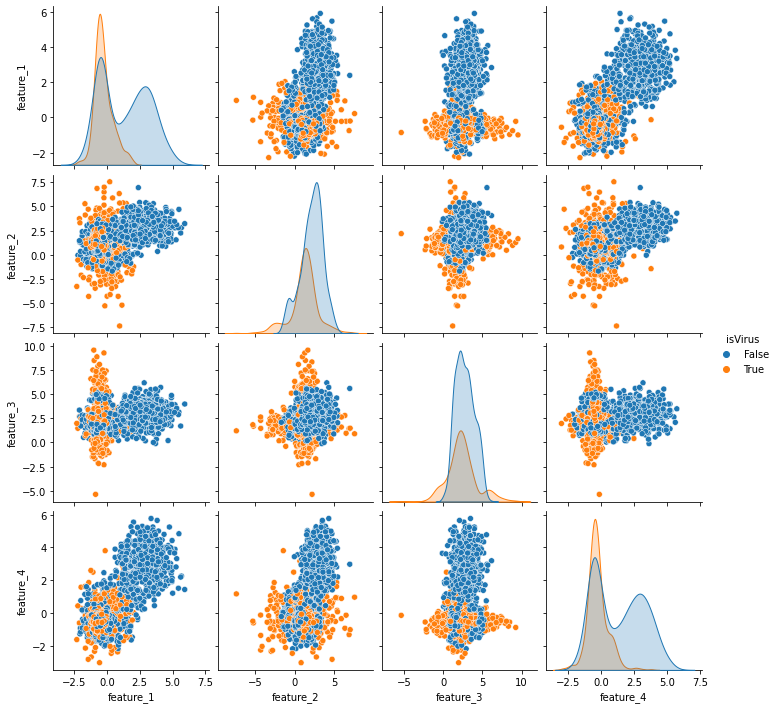

In [13]:
# Visualize the data
sns.pairplot(df, hue='isVirus')
plt.show()


In [44]:
X = df.drop('isVirus',axis=1)
y = df['isVirus']

X.head()
X.describe()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 0 to 1997
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1622 non-null   float64
 1   feature_2  1622 non-null   float64
 2   feature_3  1622 non-null   float64
 3   feature_4  1622 non-null   float64
dtypes: float64(4)
memory usage: 63.4 KB


In [51]:
x_train_1, x_test, y_train_1, y_test = train_test_split(X, y,
                                                        test_size = 0.20, random_state = 42)


x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1, 
                                                  test_size = 0.25, random_state = 42)


# X2_train = tf.keras.applications.vgg16.preprocess_input(x_train)
# X2_test = tf.keras.applications.vgg16.preprocess_input(x_test)

print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
print("x_train shape",x_val.shape)
print("y_test shape",y_val.shape)

# print("X2_train shape",X2_train.shape)
# print("X2_test shape",X2_test.shape)

x_train shape (972, 4)
x_test shape (325, 4)
y_train shape (972,)
y_test shape (325,)
x_train shape (325, 4)
y_test shape (325,)


In [39]:

categorical_col=[col for col in X_train_full.columns if X_train_full[col].dtype=='O' and X_train_full[col].nunique()<10]
print(categorical_col)

numerical_col=[col for col in X_train_full.columns if X_train_full[col].dtype in ['float64','int64']]
print(numerical_col)

my_cols=categorical_col + numerical_col
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

[]
['feature_1', 'feature_2', 'feature_3', 'feature_4']


In [52]:
x_train.head()


,feature_1,feature_2,feature_3,feature_4
1623,2.551835,2.350662,2.976577,4.079195
721,-0.473131,0.906650,4.901844,-0.819951
874,-0.431093,1.857085,3.228478,-0.079746
1198,-0.511098,3.007660,3.525077,-0.203870
1943,2.332280,3.326963,3.330035,5.225944


In [53]:
y_train.head()

1623    0
721     0
874     1
1198    0
1943    0
Name: isVirus, dtype: int64

In [49]:
y = y.astype(int)


In [54]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: isVirus, dtype: int64

In [56]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)

# specify hyperparameters for logistic regression
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'eta': 0.1,
    'max_depth': 3
}

# train the model
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

# make predictions on test data
dtest = xgb.DMatrix(x_test)
y_pred = bst.predict(dtest)

# convert probabilities to boolean values
y_pred_bool = [1 if p >= 0.5 else 0 for p in y_pred]

In [57]:
print(y_pred_bool)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1]


In [58]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_bool)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 85.54%


Accuracy: 85.54%


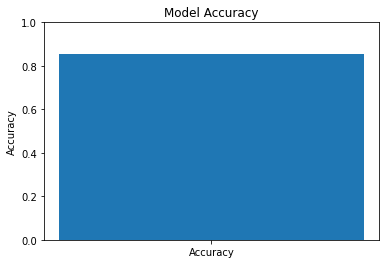

In [59]:
from matplotlib import pyplot as plt

# evaluate the model
accuracy = accuracy_score(y_test, y_pred_bool)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# plot the accuracy
plt.bar(["Accuracy"], [accuracy])
plt.ylim([0, 1])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()


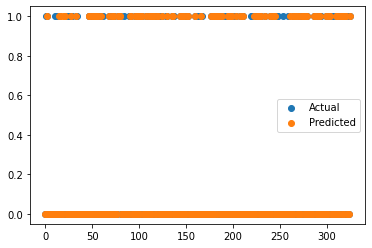

In [60]:
import matplotlib.pyplot as plt

# create a scatter plot of predicted vs actual values
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.scatter(range(len(y_test)), y_pred_bool, label='Predicted')
plt.legend()
plt.show()


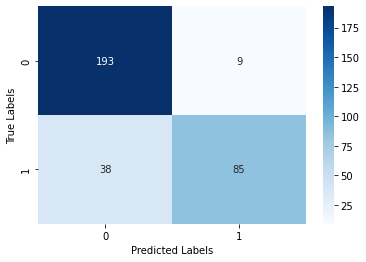

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# create confusion matrix
cm = confusion_matrix(y_test, y_pred_bool)

# plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
